In [2]:
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os
import pandas as pd

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [46]:
import pandas as pd

carsdf=pd.read_csv("used_car_sales.csv")


In [47]:
carsdf.head()

,ID,pricesold,yearsold,zipcode,Mileage,Make,Model,Year,Trim,Engine,BodyType,NumCylinders,DriveType
0,137178,7500,2020,786**,84430,Ford,Mustang,1988,LX,5.0L Gas V8,Sedan,0,RWD
1,96705,15000,2019,81006,0,Replica/Kit Makes,Jaguar Beck Lister,1958,NaN,383 Fuel injected,Convertible,8,RWD
2,119660,8750,2020,33449,55000,Jaguar,XJS,1995,2+2 Cabriolet,4.0L In-Line 6 Cylinder,Convertible,6,RWD
3,80773,11600,2019,7852,97200,Ford,Mustang,1968,Stock,289 cu. in. V8,Coupe,8,RWD
4,64287,44000,2019,7728,40703,Porsche,911,2002,Turbo X-50,3.6L,Coupe,6,AWD


In [48]:
carsdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122144 entries, 0 to 122143
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   ID            122144 non-null  int64 
 1   pricesold     122144 non-null  int64 
 2   yearsold      122144 non-null  int64 
 3   zipcode       121235 non-null  object
 4   Mileage       122144 non-null  int64 
 5   Make          122144 non-null  object
 6   Model         121571 non-null  object
 7   Year          122144 non-null  int64 
 8   Trim          73220 non-null   object
 9   Engine        95046 non-null   object
 10  BodyType      101358 non-null  object
 11  NumCylinders  122144 non-null  int64 
 12  DriveType     97293 non-null   object
dtypes: int64(6), object(7)
memory usage: 12.1+ MB


In [49]:
carsdf.size

1587872

In [50]:
carsdf.describe()

,ID,pricesold,yearsold,Mileage,Year,NumCylinders
count,122144.000000,122144.000000,122144.000000,1.221440e+05,1.221440e+05,1.221440e+05
mean,85094.212397,10808.560715,2019.375467,1.404291e+06,3.959362e+03,1.758655e+04
std,47786.970812,13987.295760,0.503671,3.335593e+07,1.984514e+05,6.144603e+06
min,1.000000,0.000000,2018.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,44547.250000,2950.000000,2019.000000,4.479225e+04,1.977000e+03,4.000000e+00
50%,85555.500000,6500.000000,2019.000000,9.000000e+04,2.000000e+03,6.000000e+00
75%,127078.500000,13800.000000,2020.000000,1.402000e+05,2.008000e+03,8.000000e+00
max,165801.000000,404990.000000,2020.000000,1.235669e+09,2.014000e+07,2.147484e+09


In [51]:
cars_df = carsdf.drop(columns=['ID', 'yearsold', 'NumCylinders', 'Engine', 'Trim', 'zipcode', 'DriveType', 'BodyType'])
cars_df

,pricesold,Mileage,Make,Model,Year
0,7500,84430,Ford,Mustang,1988
1,15000,0,Replica/Kit Makes,Jaguar Beck Lister,1958
2,8750,55000,Jaguar,XJS,1995
3,11600,97200,Ford,Mustang,1968
4,44000,40703,Porsche,911,2002
...,...,...,...,...,...
122139,4200,102700,Ford,Mustang,1977
122140,6500,128000,Ford,E-Series Van,2012
122141,2000,50000,Ford,Bronco,1978
122142,2280,164337,BMW,3-Series,2000


In [52]:
cars_df.shape

(122144, 5)

In [53]:
cars_df = cars_df.dropna()
cars_df

,pricesold,Mileage,Make,Model,Year
0,7500,84430,Ford,Mustang,1988
1,15000,0,Replica/Kit Makes,Jaguar Beck Lister,1958
2,8750,55000,Jaguar,XJS,1995
3,11600,97200,Ford,Mustang,1968
4,44000,40703,Porsche,911,2002
...,...,...,...,...,...
122139,4200,102700,Ford,Mustang,1977
122140,6500,128000,Ford,E-Series Van,2012
122141,2000,50000,Ford,Bronco,1978
122142,2280,164337,BMW,3-Series,2000


In [54]:
cars_df.shape

(121571, 5)

In [55]:
cars_df = cars_df[cars_df['Mileage'] >= 5000]
cars_df = cars_df[cars_df['Mileage'] <= 500000]
cars_df

,pricesold,Mileage,Make,Model,Year
0,7500,84430,Ford,Mustang,1988
2,8750,55000,Jaguar,XJS,1995
3,11600,97200,Ford,Mustang,1968
4,44000,40703,Porsche,911,2002
5,950,71300,Mercury,Montclair,1965
...,...,...,...,...,...
122139,4200,102700,Ford,Mustang,1977
122140,6500,128000,Ford,E-Series Van,2012
122141,2000,50000,Ford,Bronco,1978
122142,2280,164337,BMW,3-Series,2000


In [61]:
cars_df = cars_df[cars_df['Year'] >= 1900]
cars_df = cars_df[cars_df['Year'] <= 2021]
cars_df = cars_df[cars_df['Model'] != 'Other']
cars_df = cars_df[cars_df['pricesold'] >= 100]
cars_df.to_csv('cars_preprocessed.csv')

In [71]:
cars_df = pd.read_csv('cars_preprocessed.csv')
cars_df

,Unnamed: 0,pricesold,Mileage,Make,Model,Year
0,29757,312170,8400,Lamborghini,Aventador,2015
1,106696,289990,9080,Plymouth,Superbird,1970
2,24324,260300,8900,Lamborghini,Huracan,2015
3,28215,247750,7915,Lamborghini,Diablo,1999
4,30235,235100,7500,Ferrari,488,2016
...,...,...,...,...,...,...
109019,114340,100,183200,Hyundai,Sonata,2004
109020,116758,100,28389,Honda,Civic,2006
109021,116891,100,200000,Ford,Mustang,1973
109022,116920,100,12446,Toyota,Publica,1966


In [13]:
carsdf["BodyType"].value_counts()

Sedan                            18216
Coupe                            18046
SUV                              15353
Convertible                      12327
Standard Cab Pickup               4289
                                 ...  
2Dr Convertible                      1
Roadster pickup                      1
Nomad wagon                          1
2 door with removable hardtop        1
UTILITY BOX TRUCK                    1
Name: BodyType, Length: 2329, dtype: int64

In [15]:
carsdf["Mileage"].value_counts()

0         2957
100000    1513
99999     1034
999999     865
1          541
          ... 
1446         1
4394         1
296          1
26917        1
190187       1
Name: Mileage, Length: 60843, dtype: int64

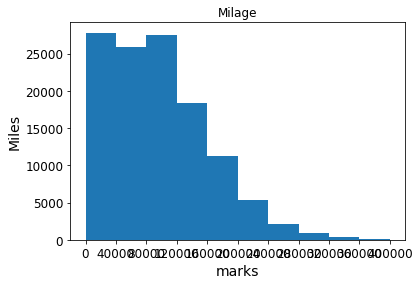

In [21]:
from matplotlib import pyplot as plt
import numpy as np
fig,ax = plt.subplots(1,1)
a = Carsdf["Mileage"]
ax.hist(a, bins = [0,40000,80000,120000,160000,200000,240000,280000,320000,360000,400000])
ax.set_title("Milage")
ax.set_xticks([0,40000,80000,120000,160000,200000,240000,280000,320000,360000,400000])
ax.set_xlabel('marks')
ax.set_ylabel('Miles')
plt.show()

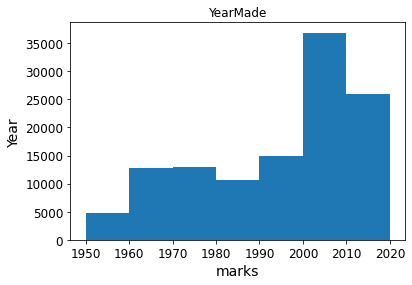

In [11]:
from matplotlib import pyplot as plt
import numpy as np
fig,ax = plt.subplots(1,1)
a = Carsdf["Year"]
ax.hist(a, bins = [1950,1960,1970,1980,1990,2000,2010,2020])
ax.set_title("YearMade")
ax.set_xticks([1950,1960,1970,1980,1990,2000,2010,2020])
ax.set_xlabel('marks')
ax.set_ylabel('Year')
plt.show()

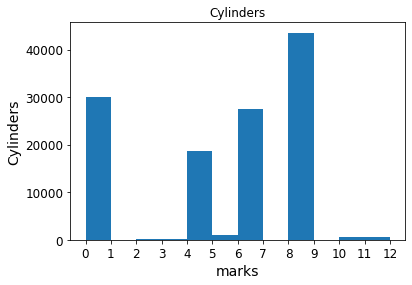

In [15]:
from matplotlib import pyplot as plt
import numpy as np
fig,ax = plt.subplots(1,1)
a = Carsdf["NumCylinders"]
ax.hist(a, bins = [0,1,2,3,4,5,6,7,8,9,10,11,12])
ax.set_title("Cylinders")
ax.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12])
ax.set_xlabel('marks')
ax.set_ylabel('Cylinders')
plt.show()

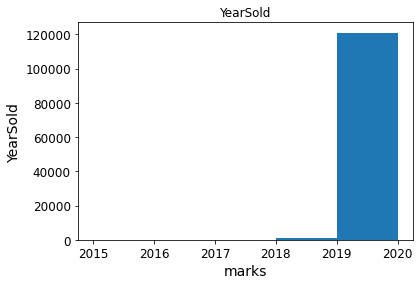

In [18]:
from matplotlib import pyplot as plt
import numpy as np
fig,ax = plt.subplots(1,1)
a = Carsdf["yearsold"]
ax.hist(a, bins = [2015,2016,2017,2018,2019,2020])
ax.set_title("YearSold")
ax.set_xticks([2015,2016,2017,2018,2019,2020])
ax.set_xlabel('marks')
ax.set_ylabel('YearSold')
plt.show()